# Section 4.1 — Simple linear regression

This notebook contains the code examples from [Section 4.1 Simple linear regression]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (5, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/lm/simple"

<Figure size 640x480 with 0 Axes>

In [3]:
from plot_helpers import plot_residuals
from plot_helpers import plot_residuals2

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
import warnings
# silence kurtosistest warning when using n < 20
warnings.filterwarnings("ignore", category=UserWarning)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

$$
\newcommand{\CI}[1]{\textbf{CI}_{#1}}
\newcommand{\CIL}[1]{\textbf{L}_{#1}}
\newcommand{\CIU}[1]{\textbf{U}_{#1}}
\newcommand{\ci}[1]{\textbf{ci}_{#1}}
\newcommand{\cil}[1]{\textbf{l}_{#1}}
\newcommand{\ciu}[1]{\textbf{u}_{#1}}
$$


(this cell contains the macro definitions like $\stderr{\overline{\mathbf{x}}}$, $\stderrhat{}$, $\Mean$, ...)

## Definitions

## Example 1: students score as a function of effort

In [20]:
students = pd.read_csv("../datasets/students.csv")
# students.head()

In [7]:
import statsmodels.formula.api as smf
#######################################################
model1 = smf.ols('score ~ 1 + effort', data=students)
fit1 = model1.fit()

# the coefficients of the best-fit line
b0 = fit1.params.Intercept
b1 = fit1.params.effort
b0, b1

(32.465809301599606, 4.504850344209074)

In [8]:
# fit1.summary()

<Axes: xlabel='effort', ylabel='score'>

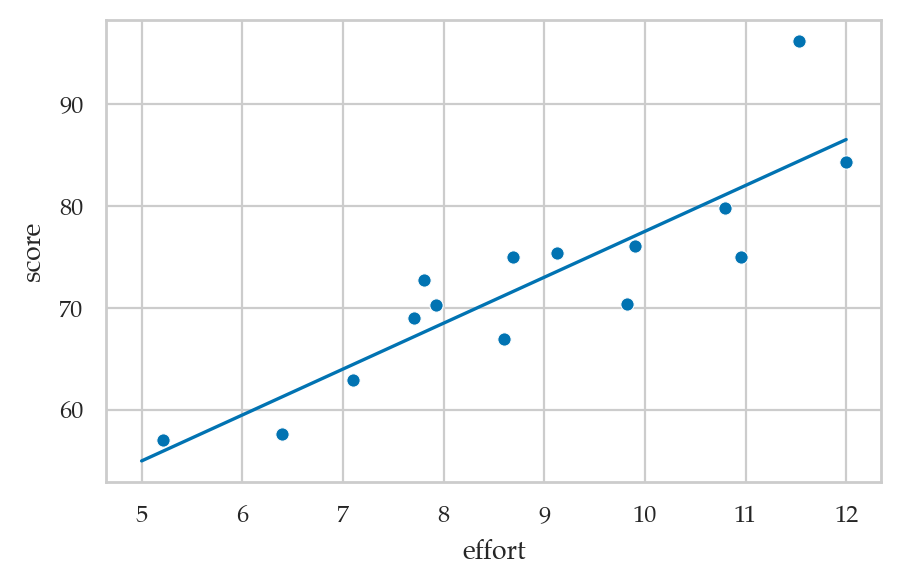

In [9]:
sns.scatterplot(data=students, x='effort', y='score')

xs = np.linspace(5, 12)
yhats = b0 + b1*xs
sns.lineplot(x=xs, y=yhats, color="b")

In [10]:
# # ALT.
# sns.regplot(data=students, x="effort", y="score", ci=None);

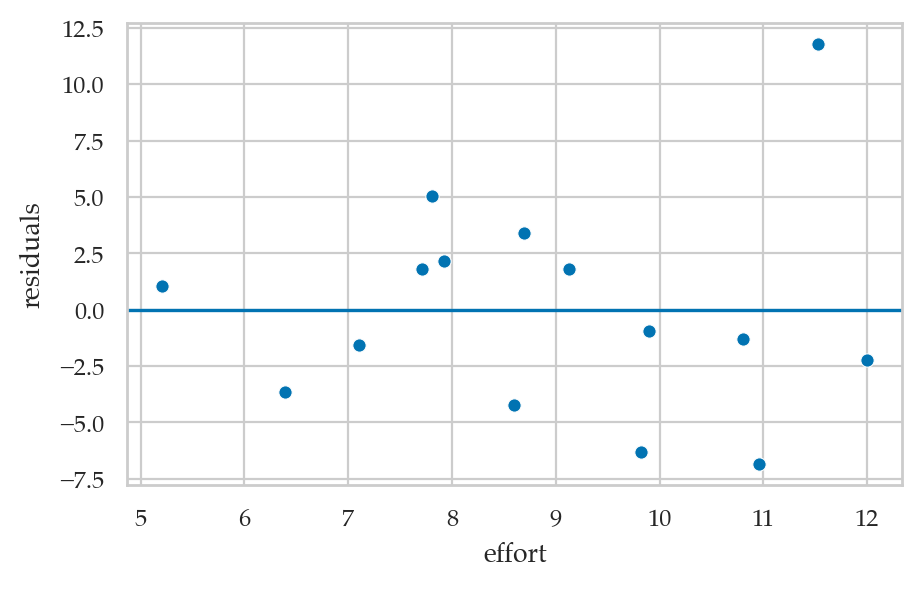

In [11]:
ax = sns.scatterplot(x=students["effort"], y=fit1.resid)
ax.set_ylabel("residuals")
ax.axhline(y=0, color='b');

In [12]:
# # ALT.
# sns.residplot(data=students, x="effort", y="score", lowess=True, color="g");

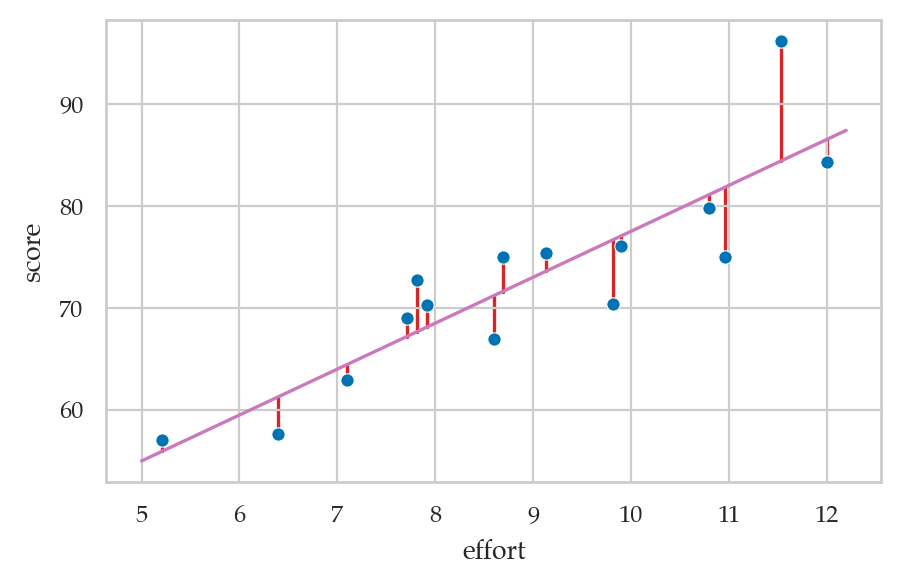

In [19]:
plot_residuals(students["effort"], students["score"], b0, b1)
sns.scatterplot(data=students, x='effort', y='score')
xs = np.linspace(5, 12.2)
yhats = b0 + b1*xs
sns.lineplot(x=xs, y=yhats, color="C4");

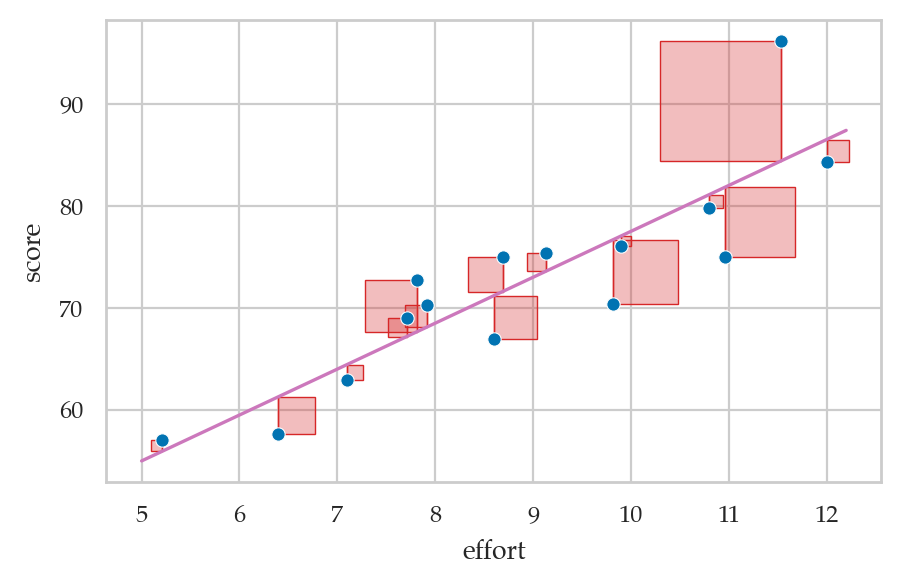

In [18]:
ax = sns.scatterplot(data=students, x='effort', y='score', zorder=4)
xs = np.linspace(5, 12.2)
yhats = b0 + b1*xs
sns.lineplot(x=xs, y=yhats, color="C4", zorder=5)
plot_residuals2(students["effort"], students["score"], b0, b1, ax=ax);